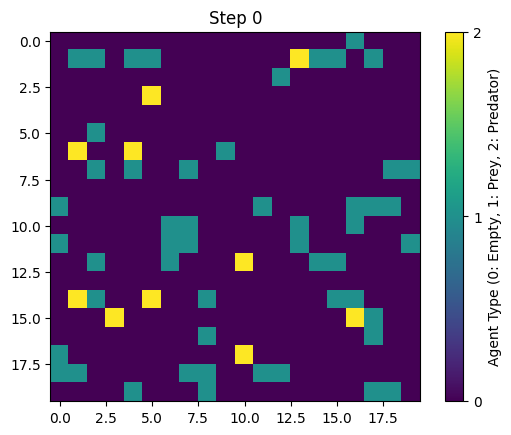

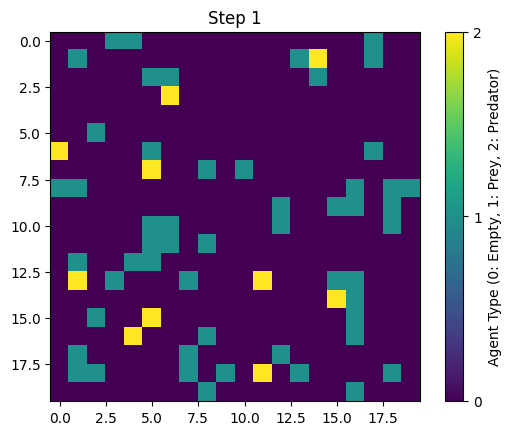

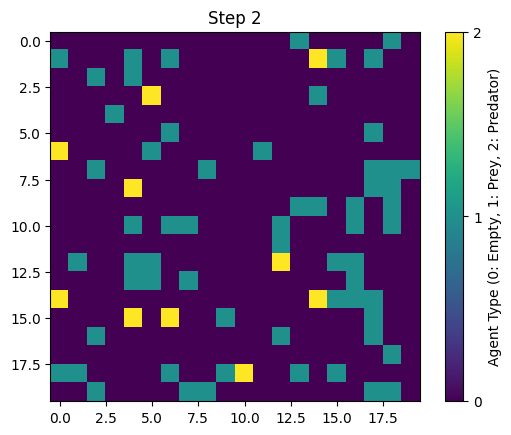

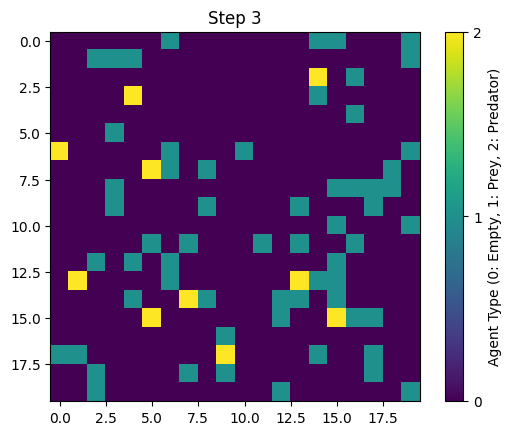

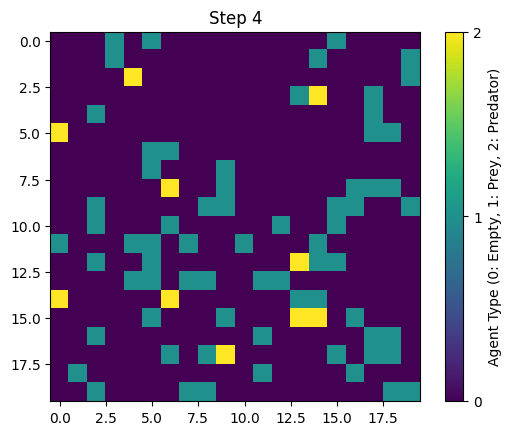

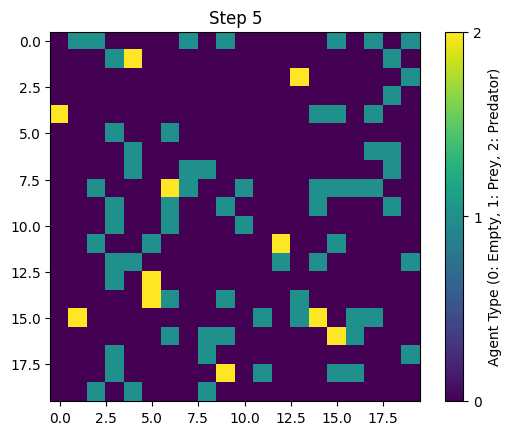

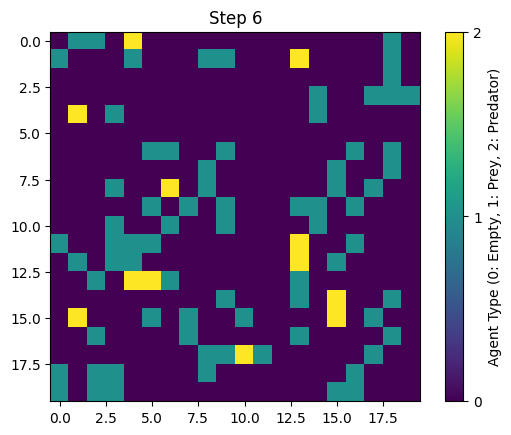

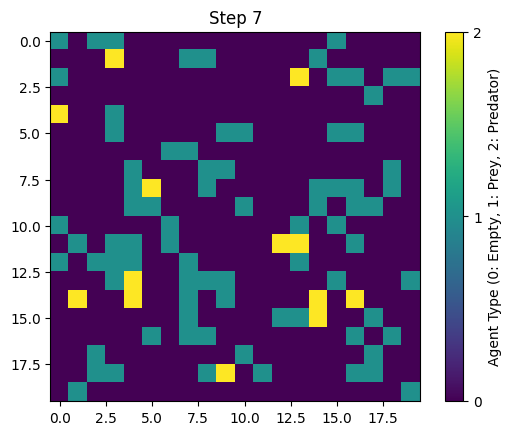

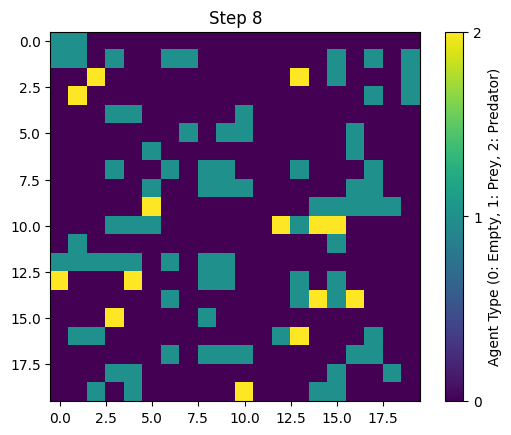

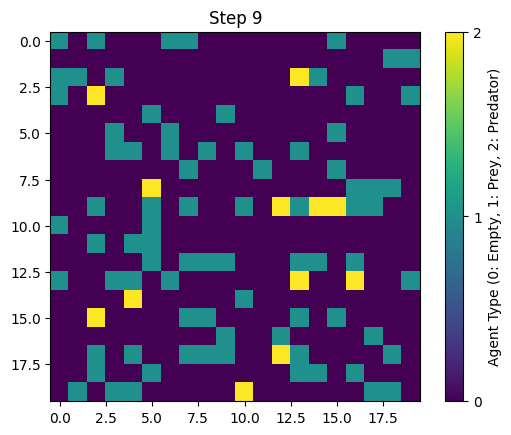

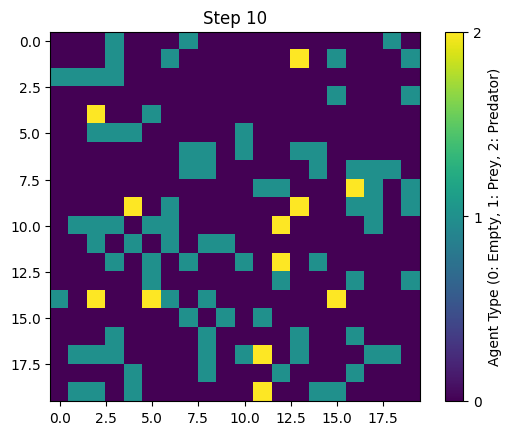

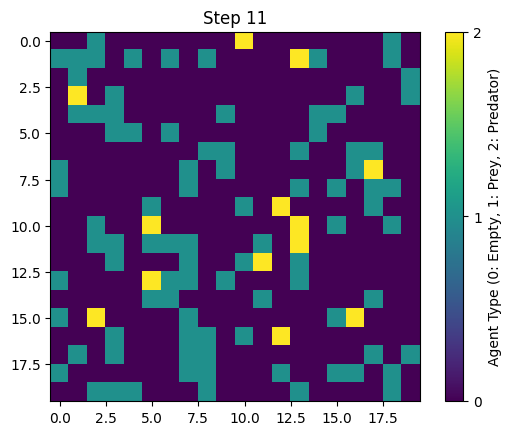

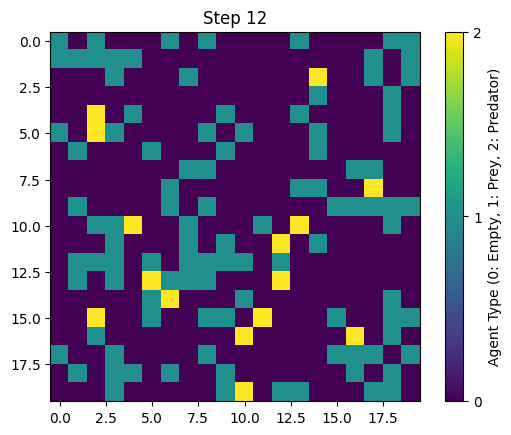

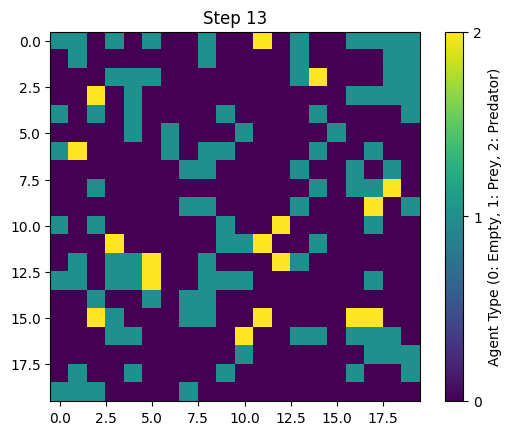

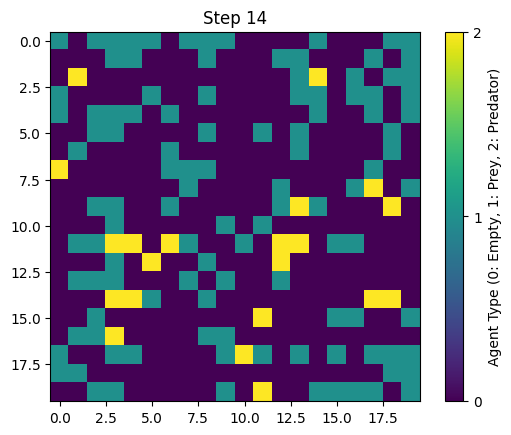

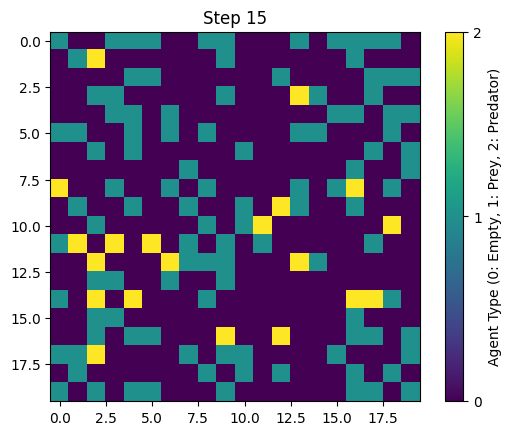

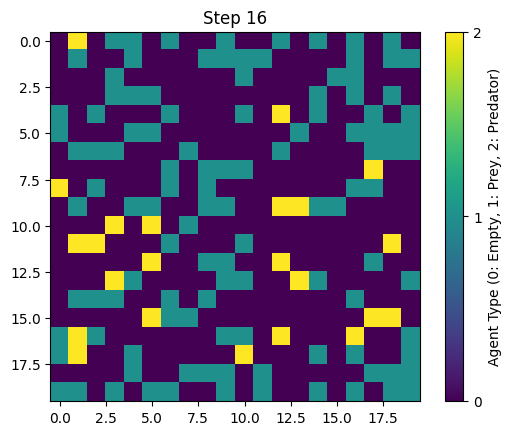

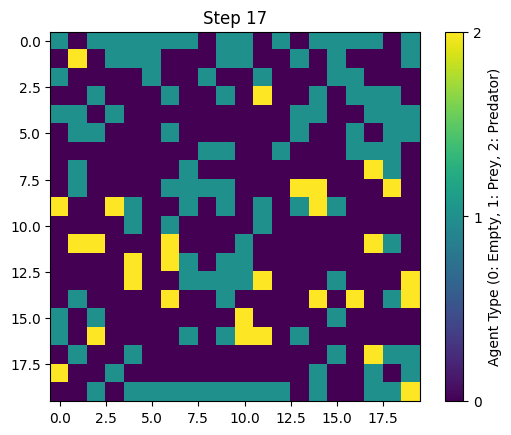

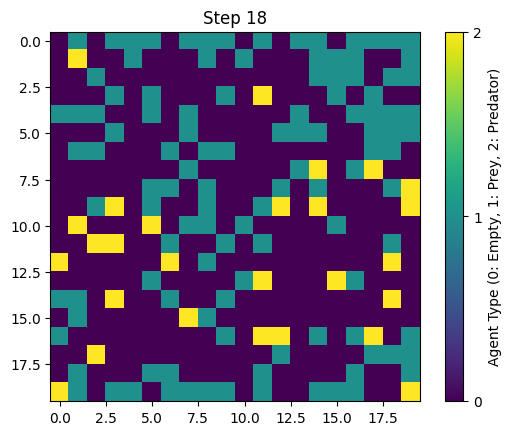

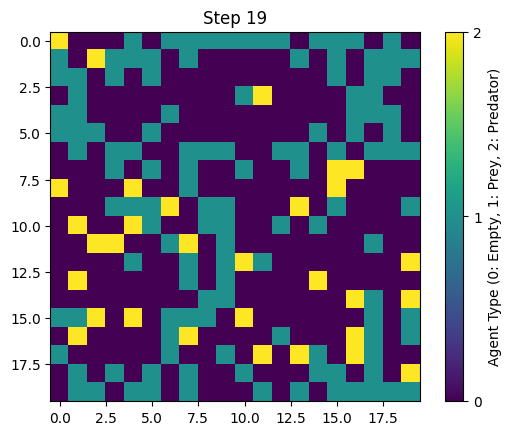

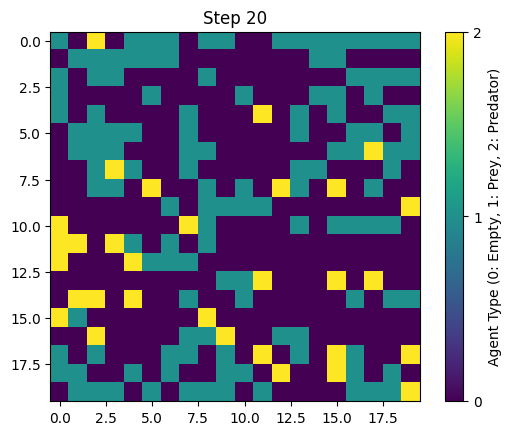

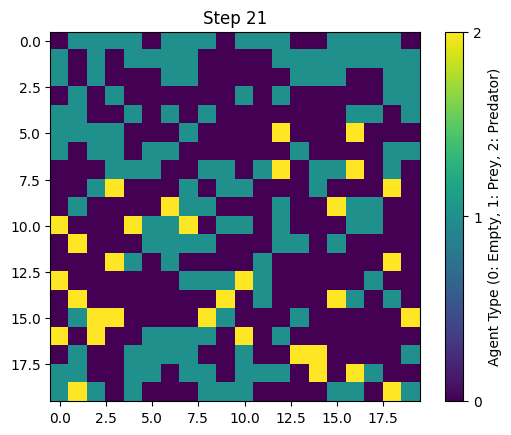

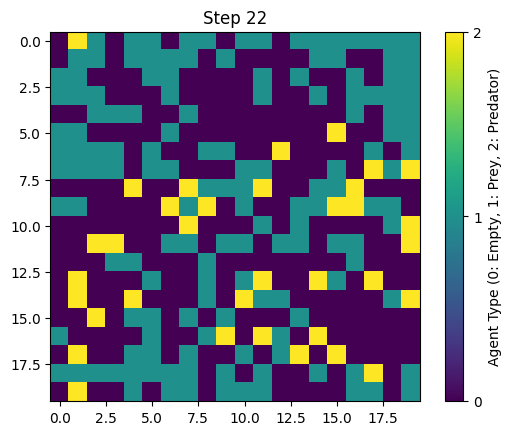

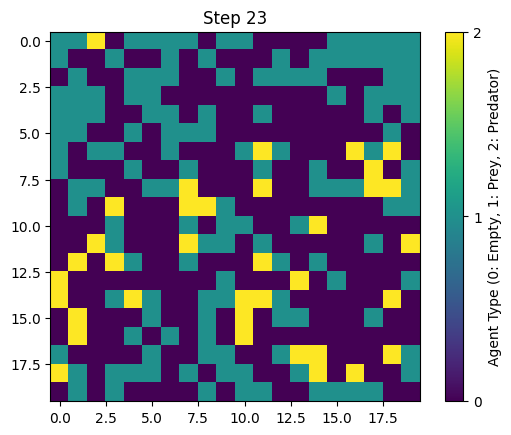

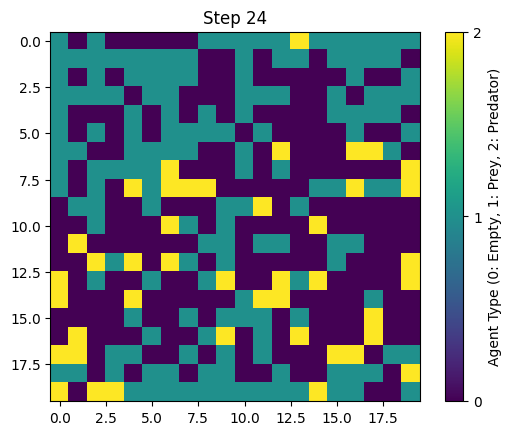

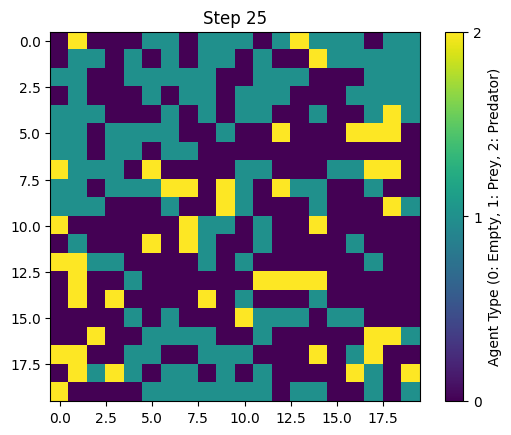

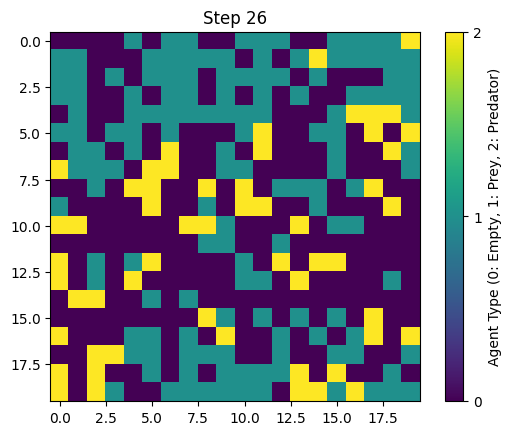

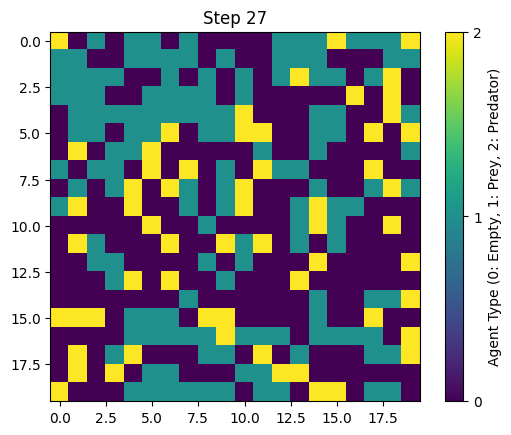

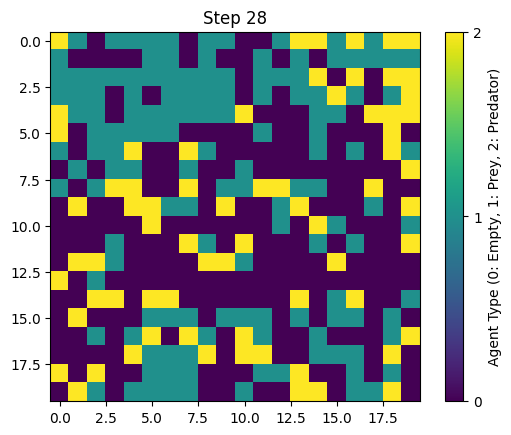

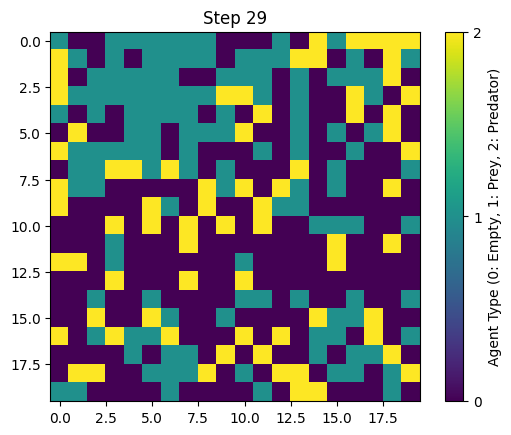

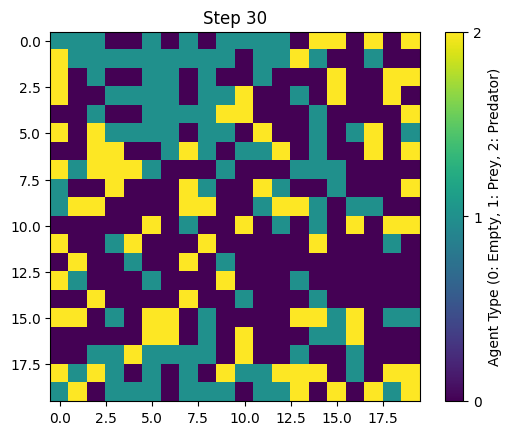

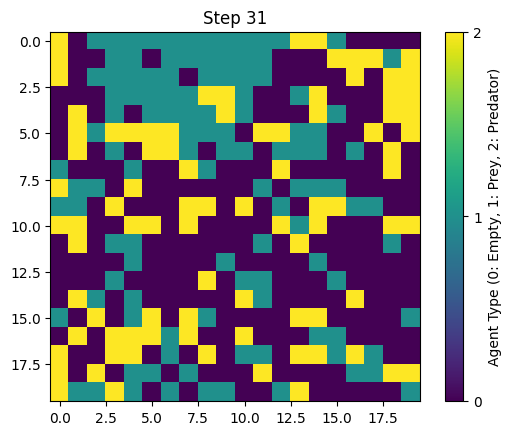

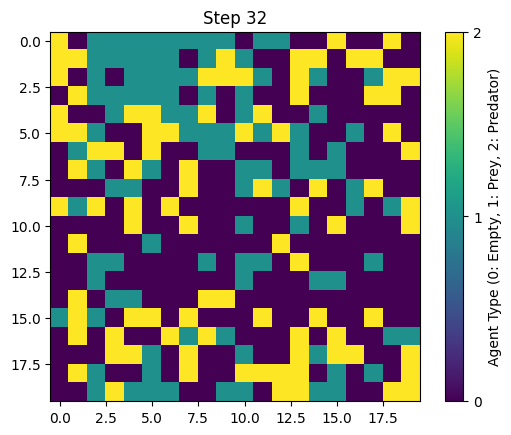

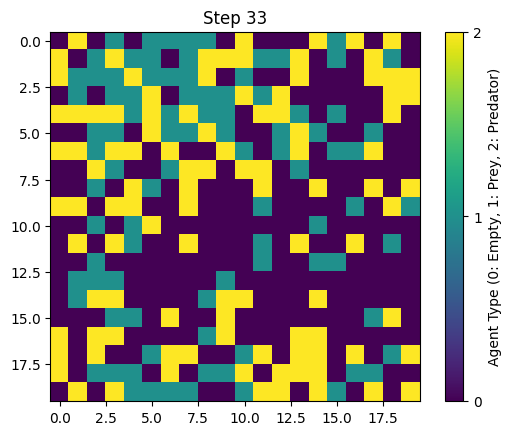

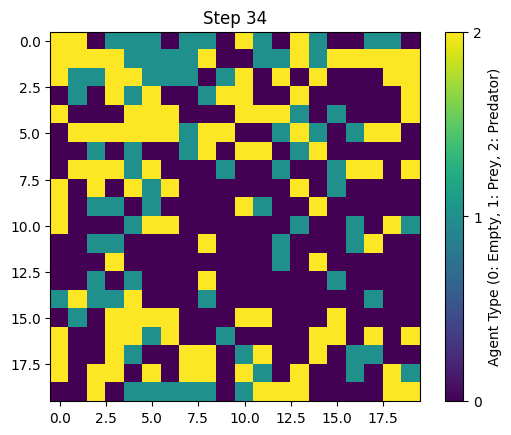

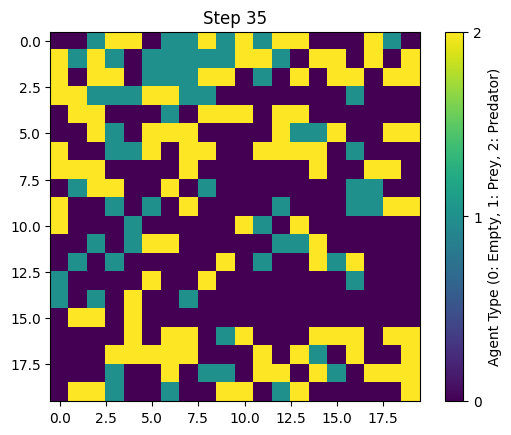

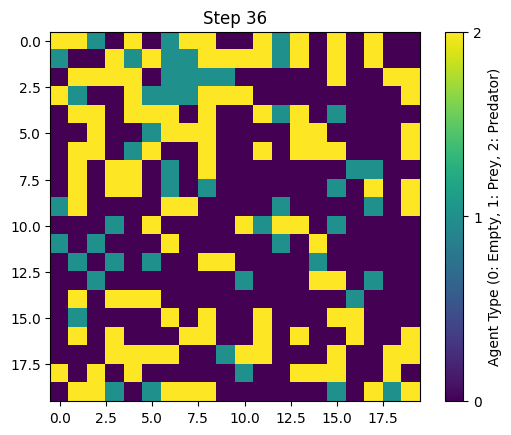

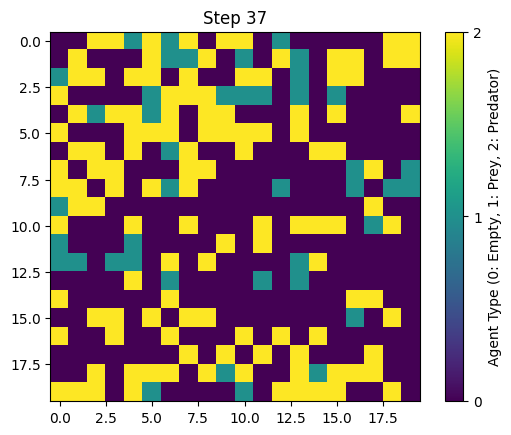

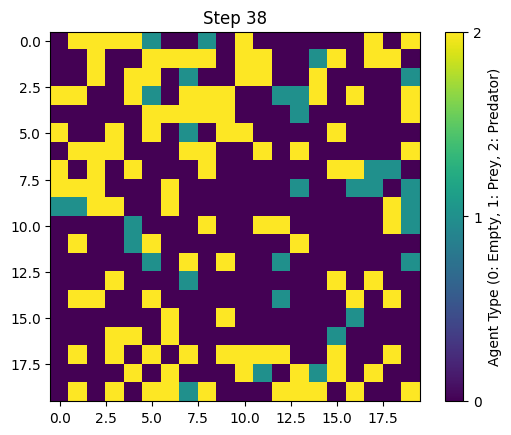

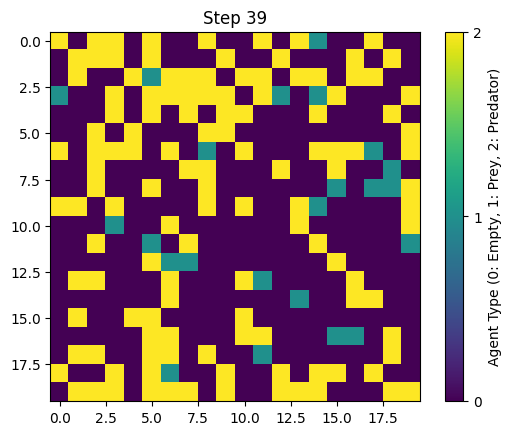

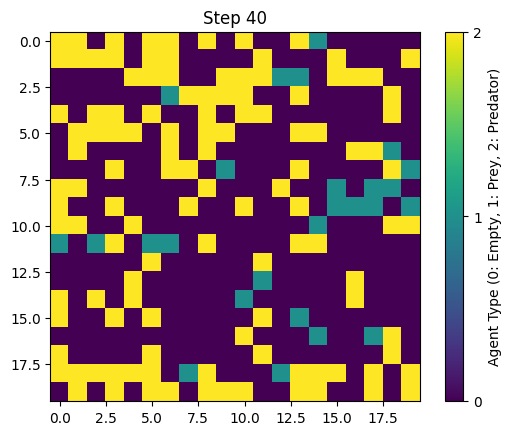

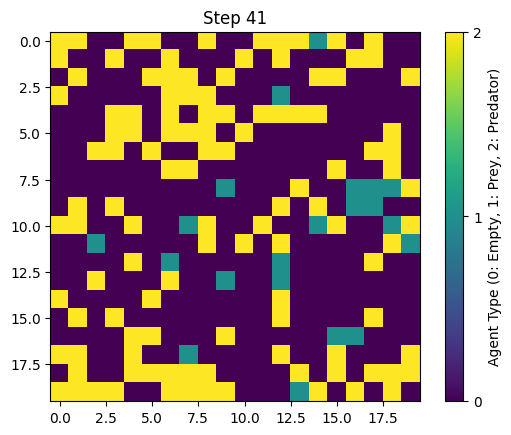

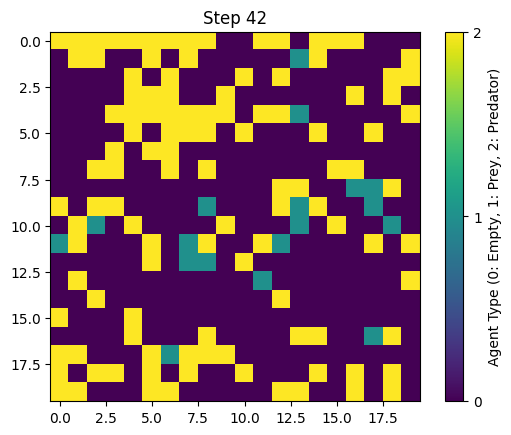

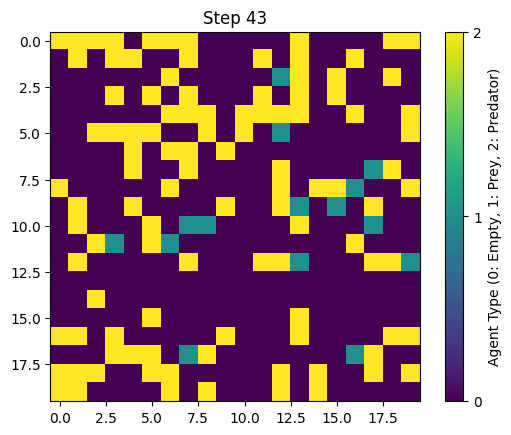

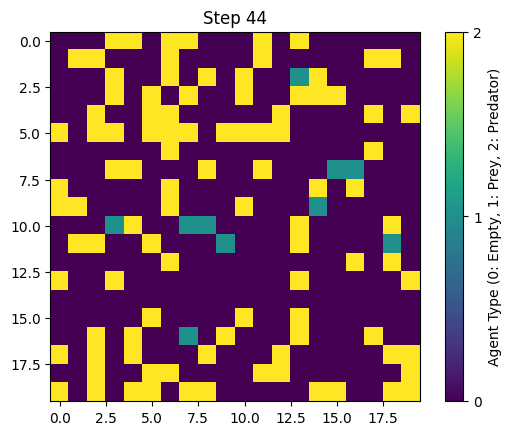

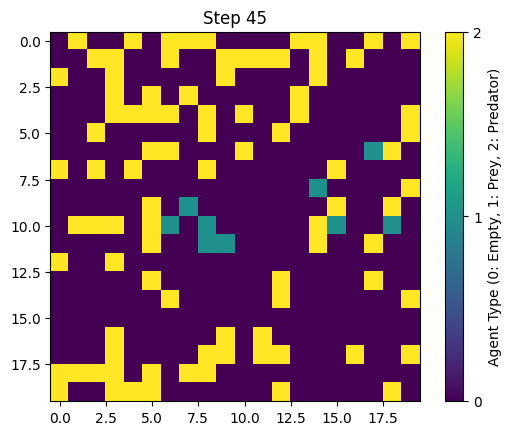

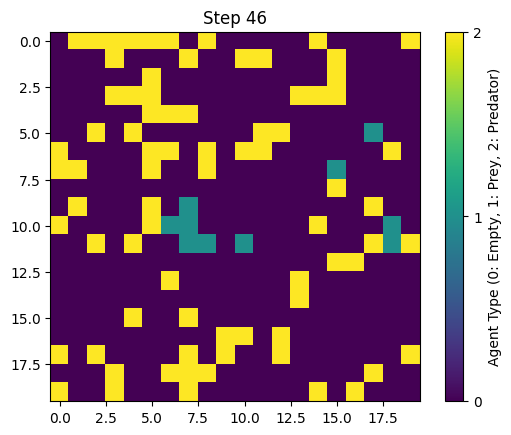

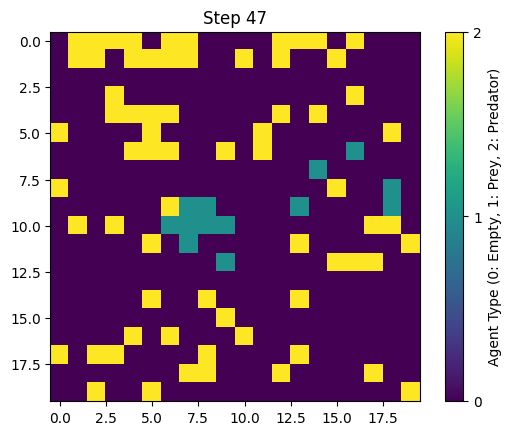

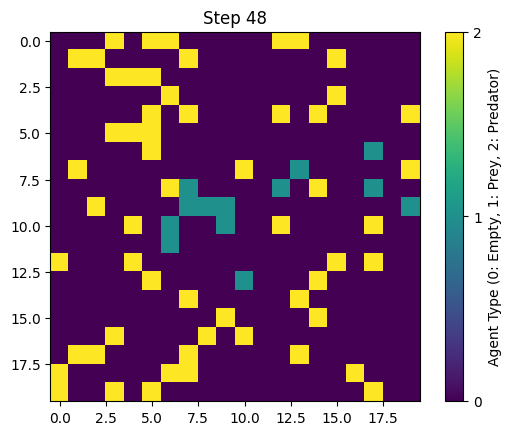

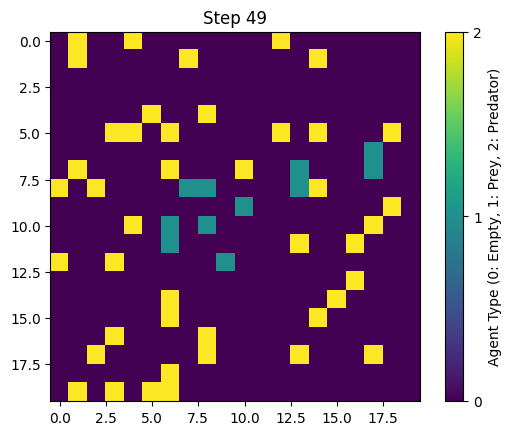

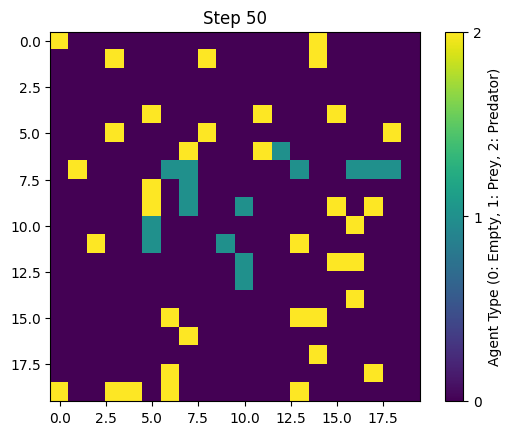

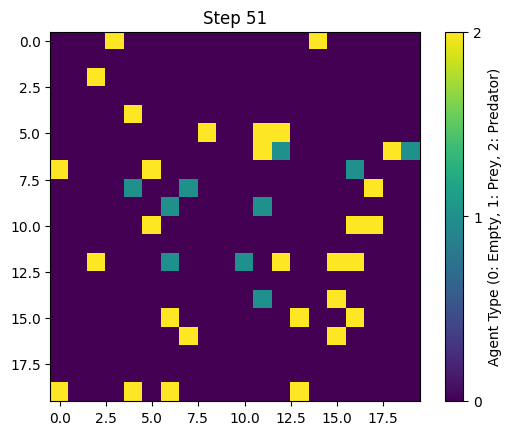

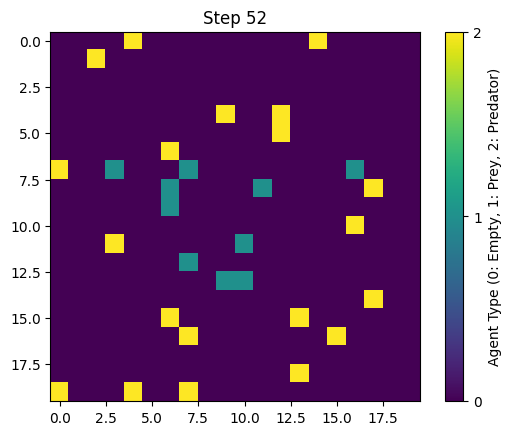

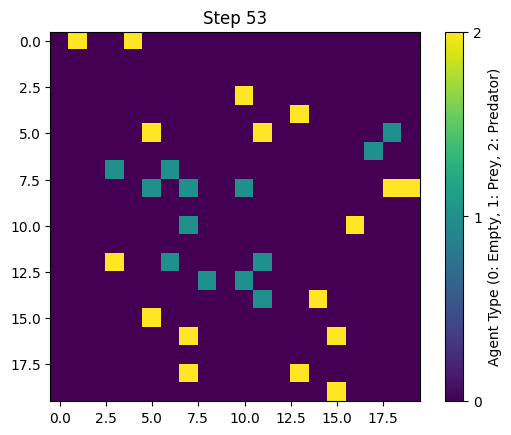

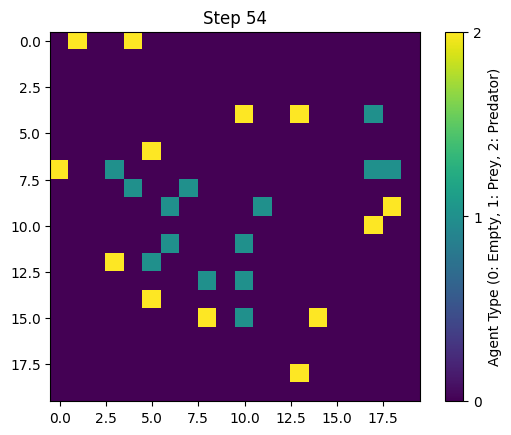

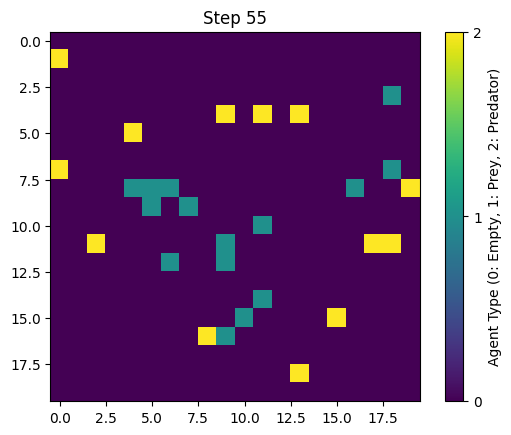

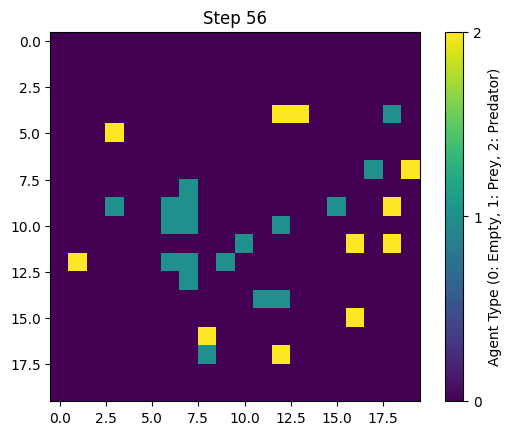

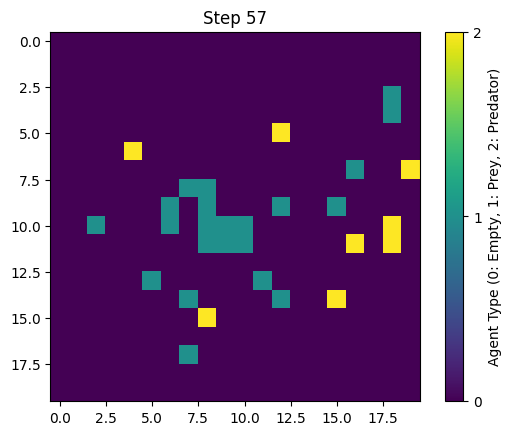

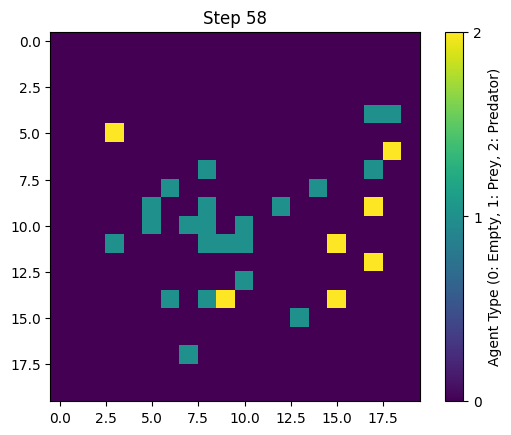

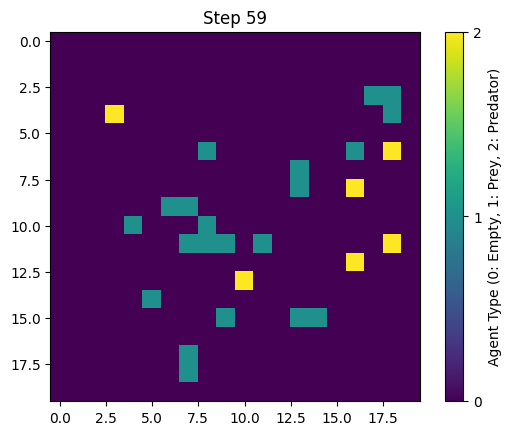

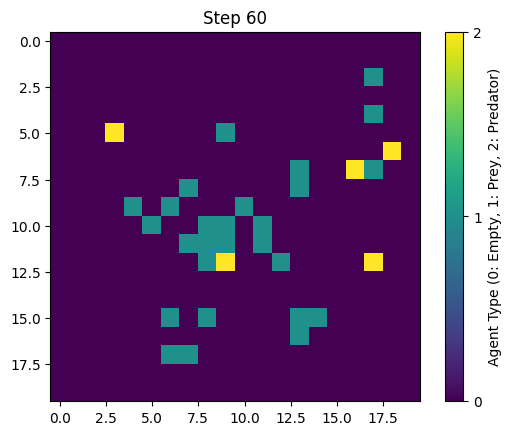

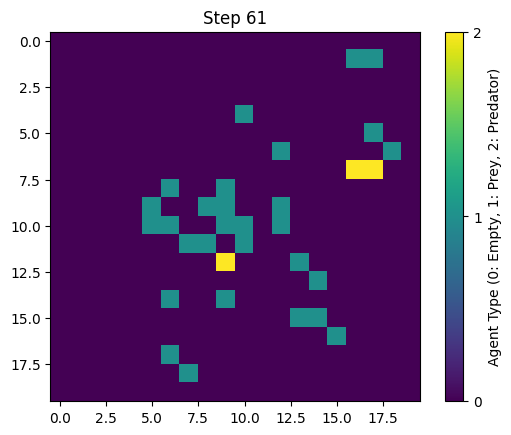

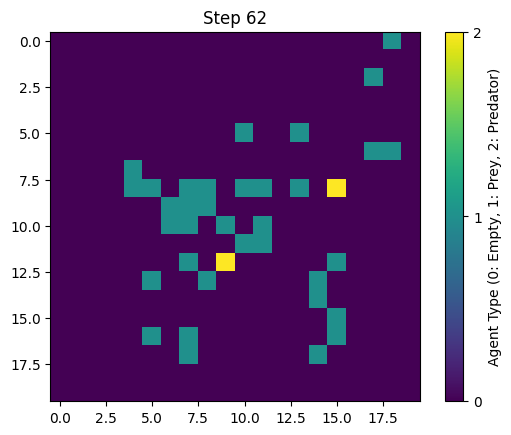

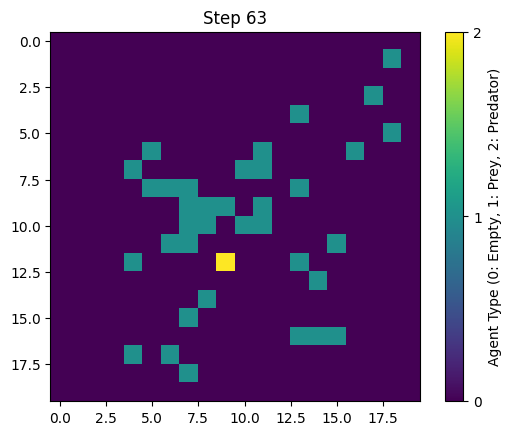

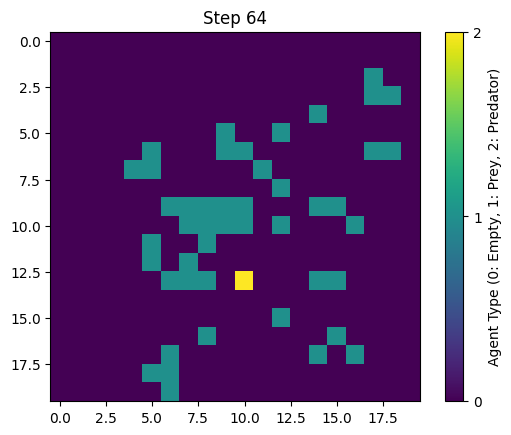

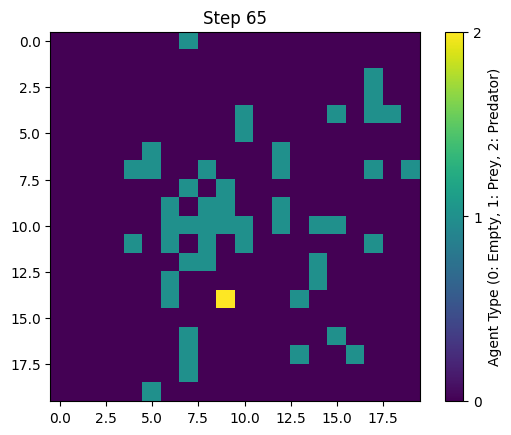

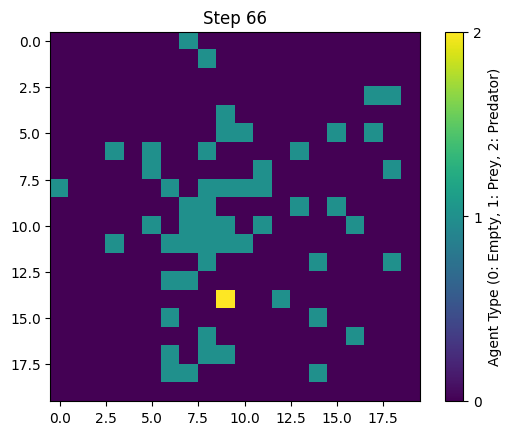

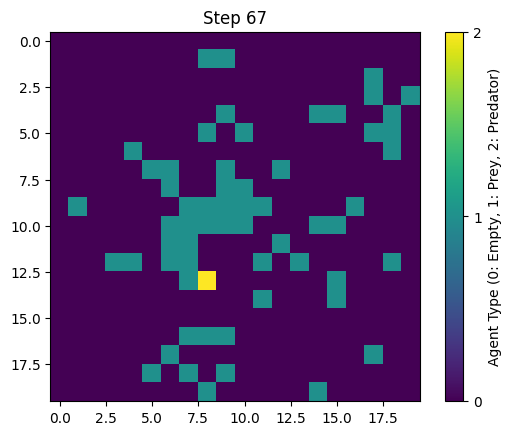

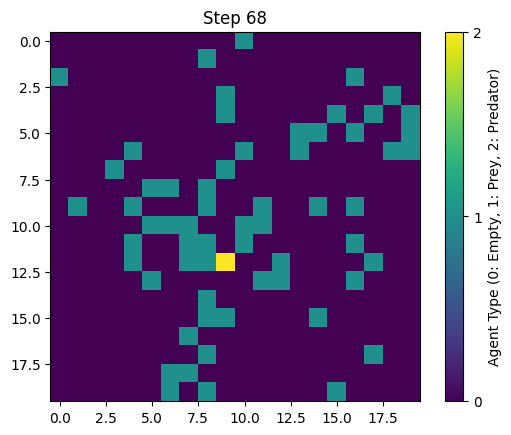

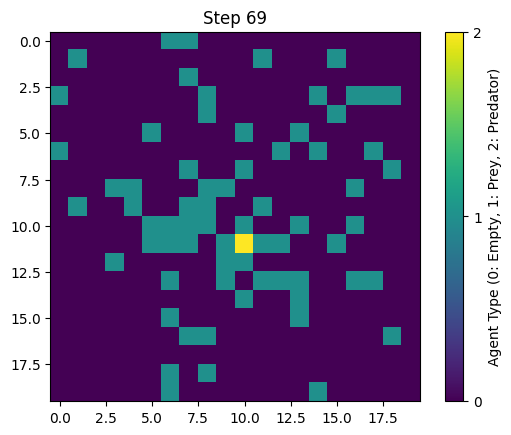

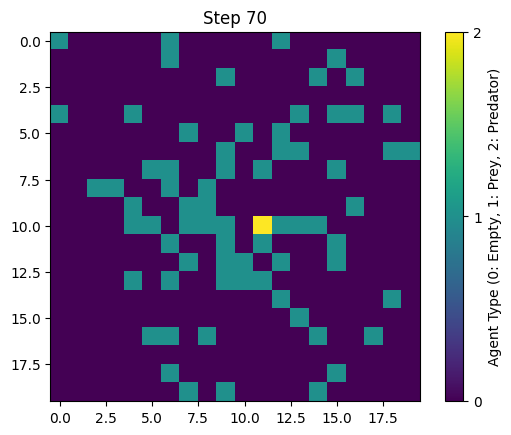

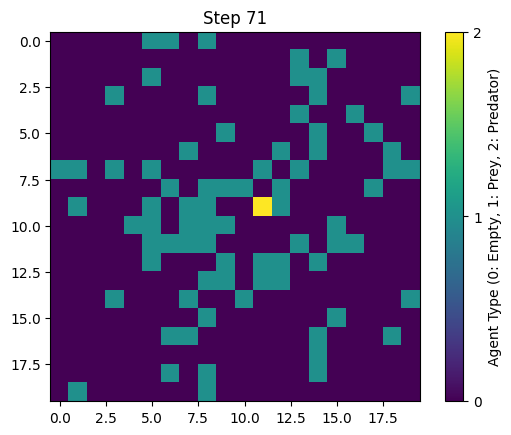

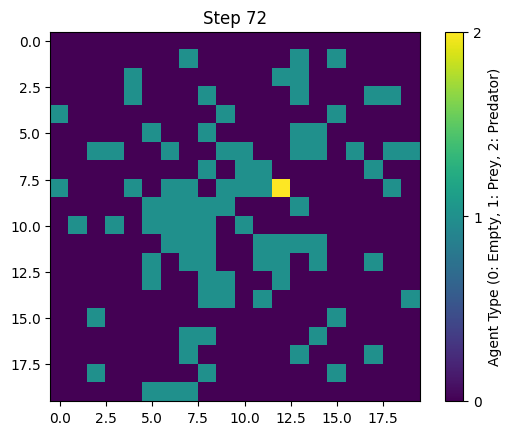

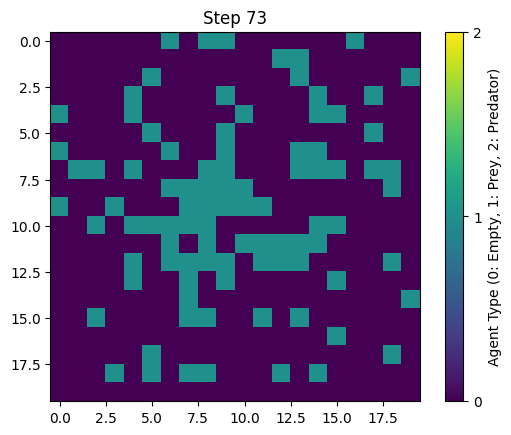

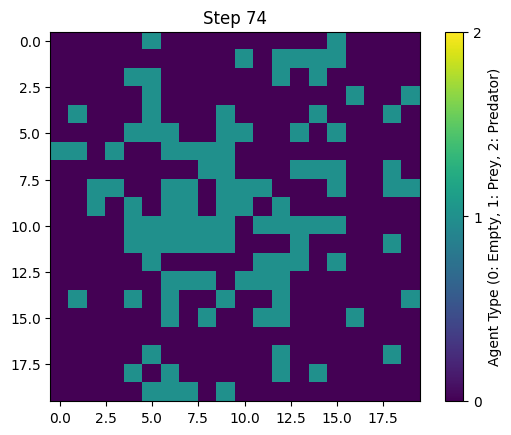

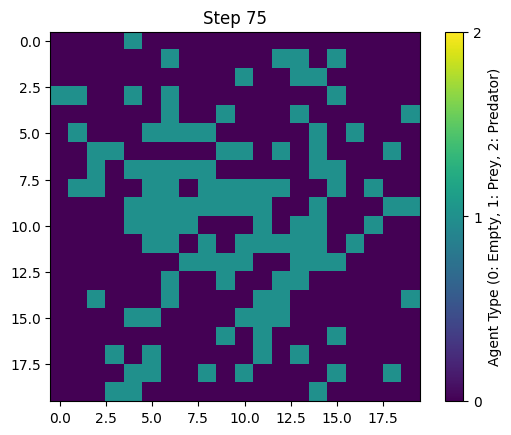

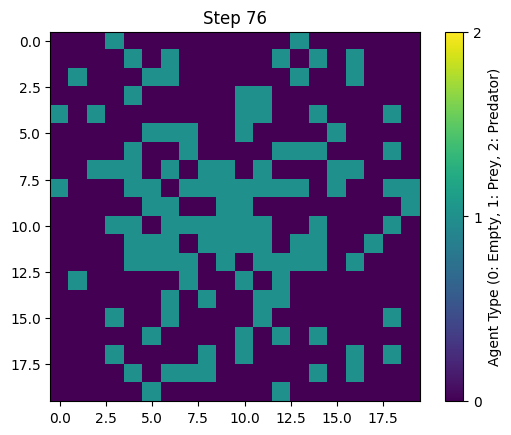

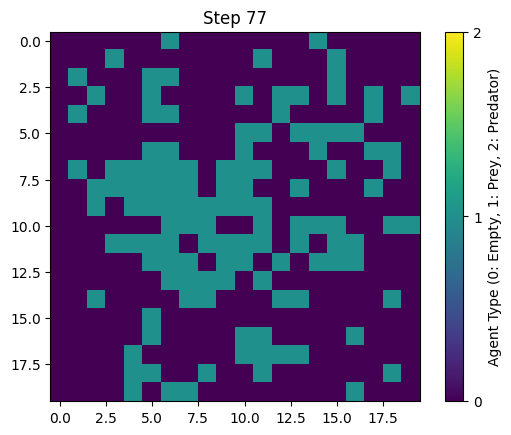

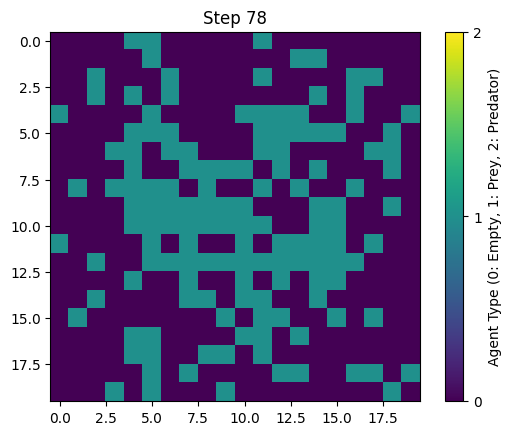

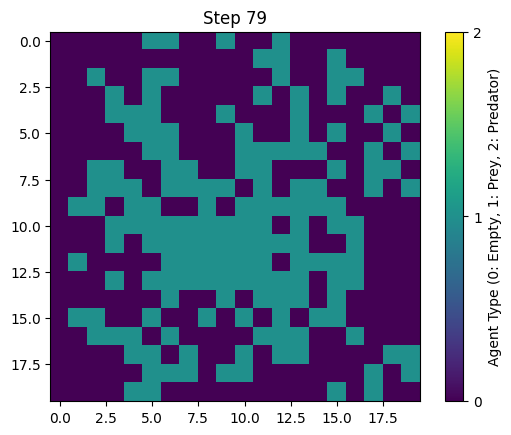

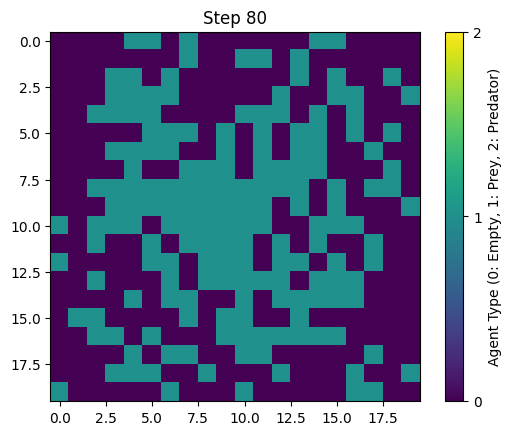

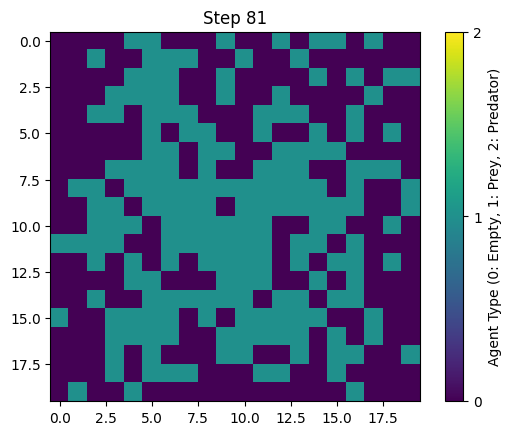

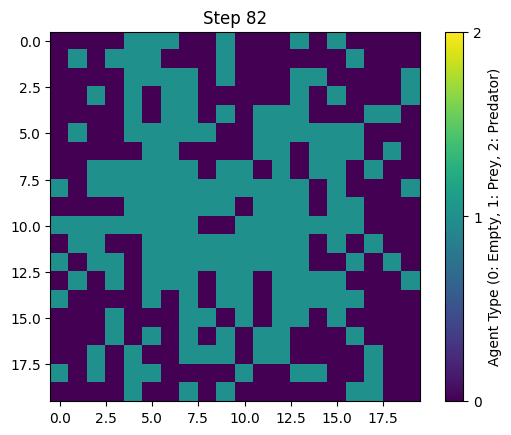

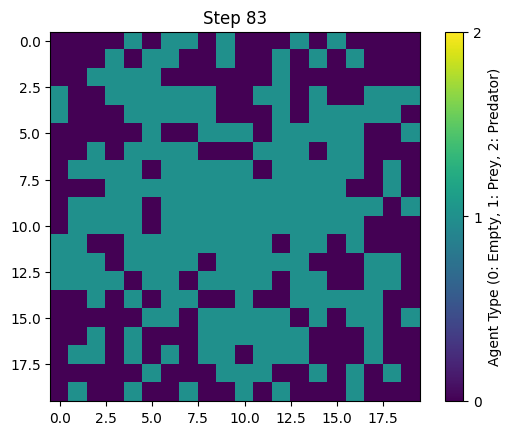

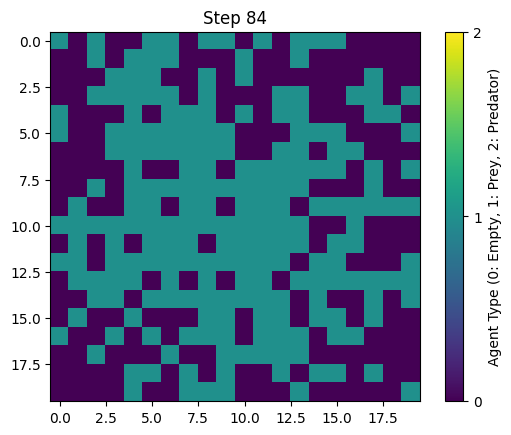

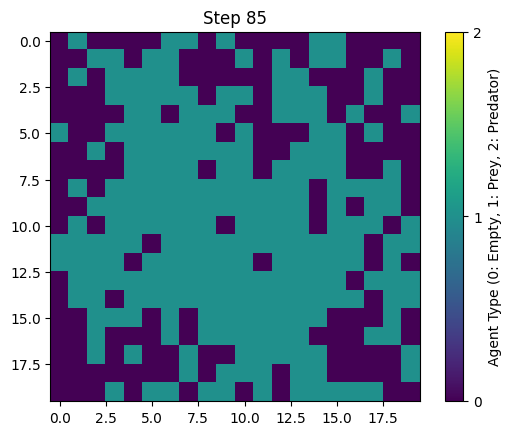

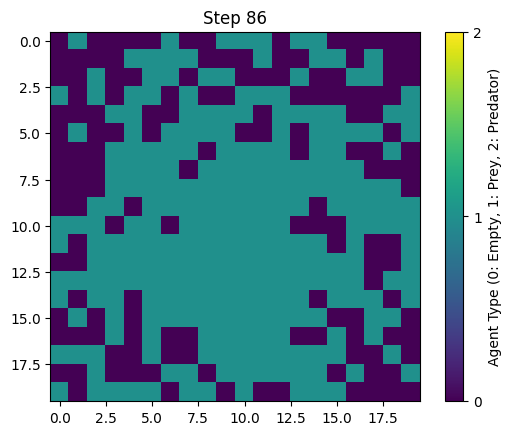

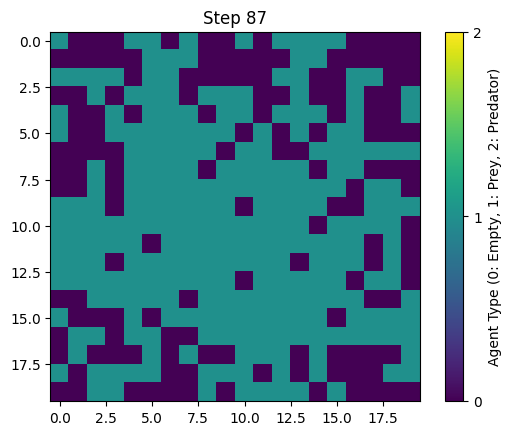

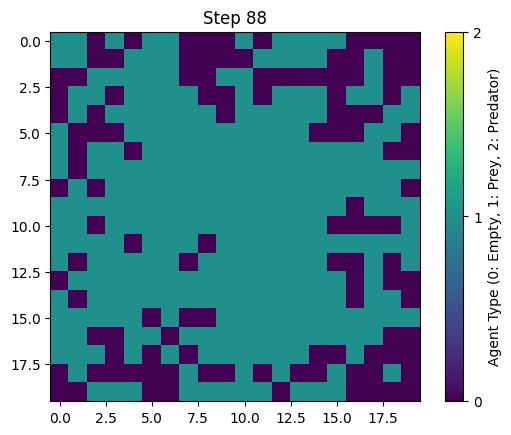

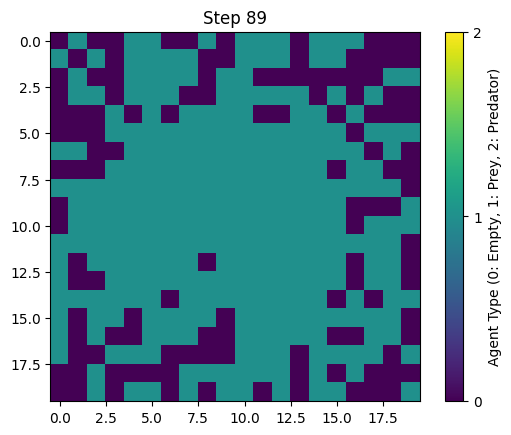

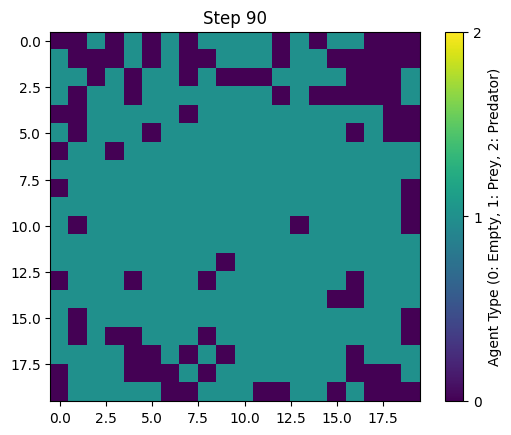

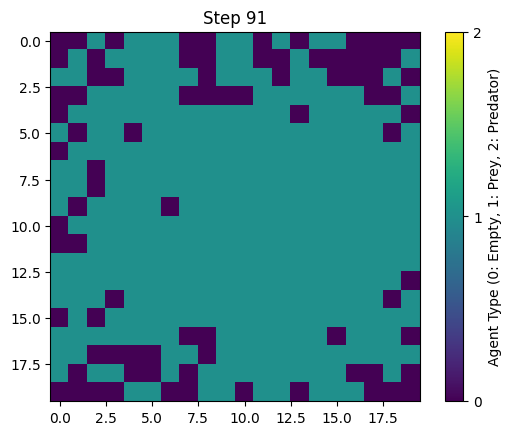

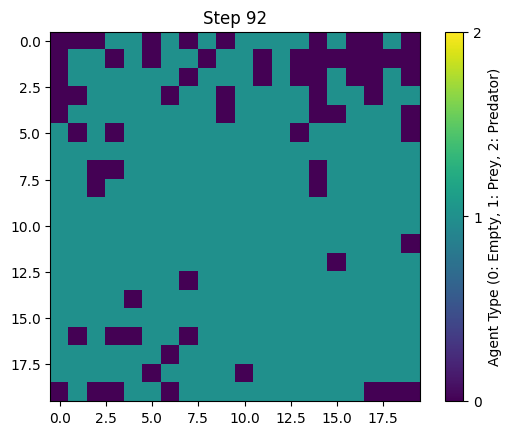

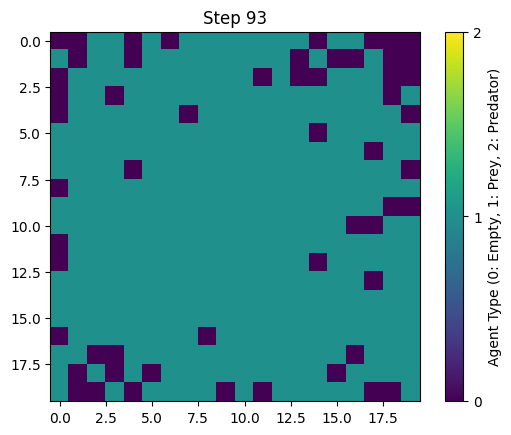

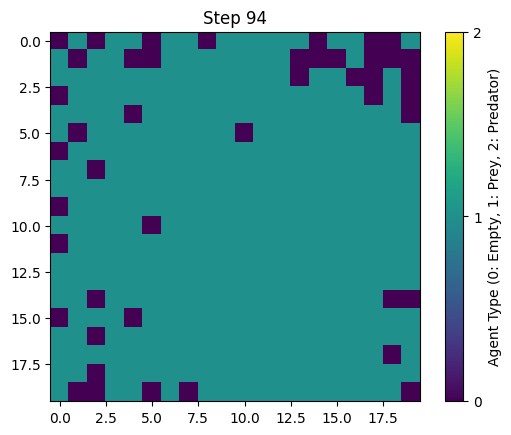

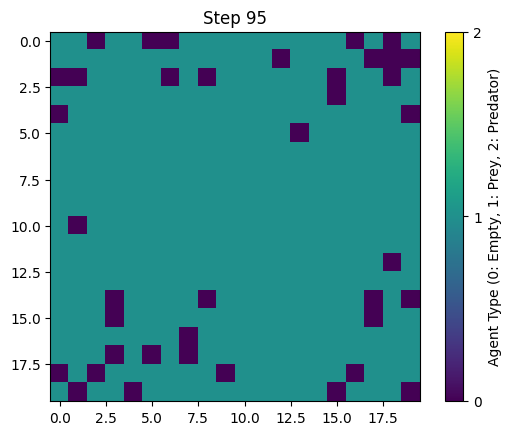

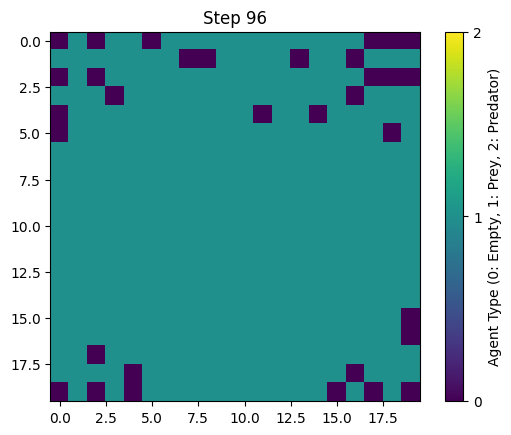

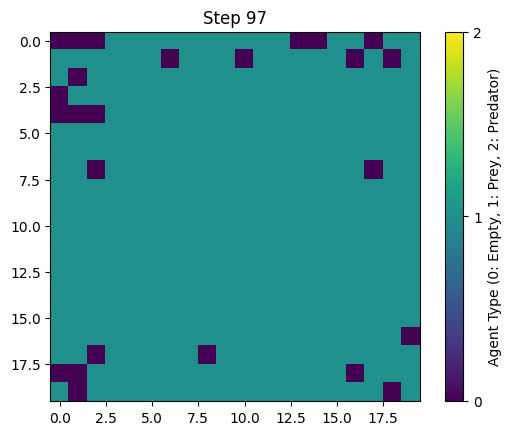

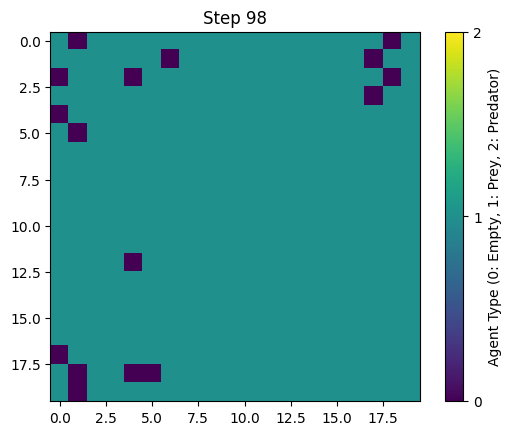

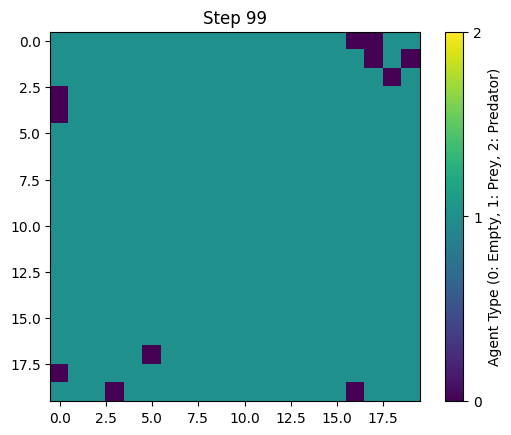

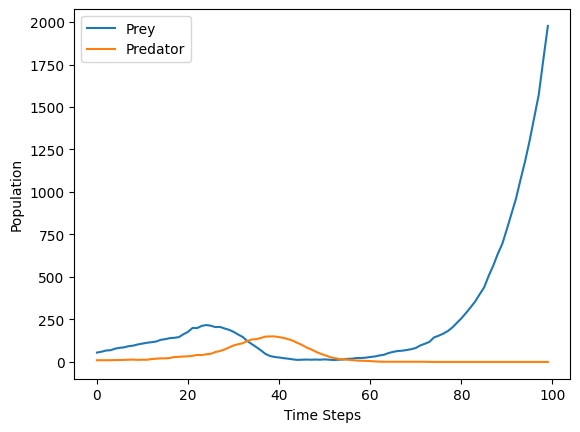

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Parameters
GRID_SIZE = 20
NUM_PREY = 50
NUM_PREDATORS = 10
PREY_REPRODUCTION_TIME = 5
PREDATOR_ENERGY = 10
STEPS = 100

# Agent classes
class Prey:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.energy = 0

class Predator:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.energy = PREDATOR_ENERGY

# Initialize grid and agents
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)  # Use int instead of object
prey_list = [Prey(random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)) for _ in range(NUM_PREY)]
predator_list = [Predator(random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)) for _ in range(NUM_PREDATORS)]

# Simulation loop
prey_population = []
predator_population = []

for step in range(STEPS):
    # Update prey
    for prey in prey_list:
        # Move randomly
        prey.x = (prey.x + random.choice([-1, 0, 1])) % GRID_SIZE
        prey.y = (prey.y + random.choice([-1, 0, 1])) % GRID_SIZE
        # Reproduce
        if random.random() < 0.1:  # 10% chance to reproduce
            prey_list.append(Prey(prey.x, prey.y))

    # Update predators
    for predator in predator_list:
        # Move randomly
        predator.x = (predator.x + random.choice([-1, 0, 1])) % GRID_SIZE
        predator.y = (predator.y + random.choice([-1, 0, 1])) % GRID_SIZE
        # Hunt prey
        for prey in prey_list:
            if prey.x == predator.x and prey.y == predator.y:
                prey_list.remove(prey)  # Prey is eaten
                predator.energy += 5
        # Lose energy
        predator.energy -= 1
        # Die if energy is 0
        if predator.energy <= 0:
            predator_list.remove(predator)
        # Reproduce
        if predator.energy >= 15:
            predator_list.append(Predator(predator.x, predator.y))
            predator.energy = PREDATOR_ENERGY

    # Track populations
    prey_population.append(len(prey_list))
    predator_population.append(len(predator_list))

    # Update grid for visualization
    grid.fill(0)  # Reset grid
    for prey in prey_list:
        grid[prey.x, prey.y] = 1  # Prey represented by 1
    for predator in predator_list:
        grid[predator.x, predator.y] = 2  # Predator represented by 2

    # Visualization
    plt.clf()  # Clear the previous frame
    plt.imshow(grid, cmap='viridis', vmin=0, vmax=2)
    plt.title(f"Step {step}")
    plt.colorbar(ticks=[0, 1, 2], label="Agent Type (0: Empty, 1: Prey, 2: Predator)")
    plt.pause(0.1)

# Plot population dynamics
plt.figure()
plt.plot(prey_population, label="Prey")
plt.plot(predator_population, label="Predator")
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.legend()
plt.show()